In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
import diffimTests as dit
#reload(dit)

testObj = dit.DiffimTest(n_sources=2000)
exposure = testObj.im1.asAfwExposure()

No module named psfex.psfexPsfDeterminer
Flux range: 30000.0 500.0
global name 'log_level' is not defined


In [50]:
import lsst.ip.diffim as ipDiffim
#reload(ipDiffim)
config = ipDiffim.ImageMapReduceConfig()

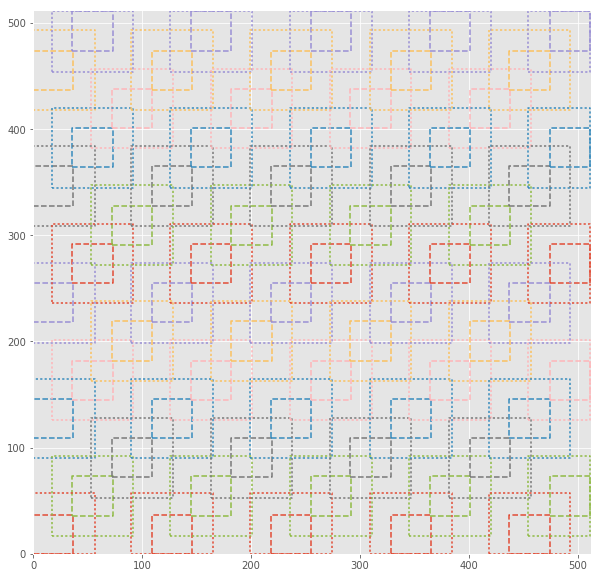

In [51]:
task = ipDiffim.ImageMapReduceTask(config=config)
plt.figure(figsize=(10,10))
task._generateGrid(exposure, forceEvenSized=True)
task.plotBoxes(exposure.getBBox(), skip=3);

In [52]:
newExp = task.run(exposure).exposure  # this just returns the same exposure

stats(mean=5.4581165, stdev=20.282354, min=-72.0, max=1879.0)
stats(mean=5.4581165, stdev=20.282354, min=-72.0, max=1879.0)
stats(mean=0.0, stdev=0.0, min=0.0, max=0.0)


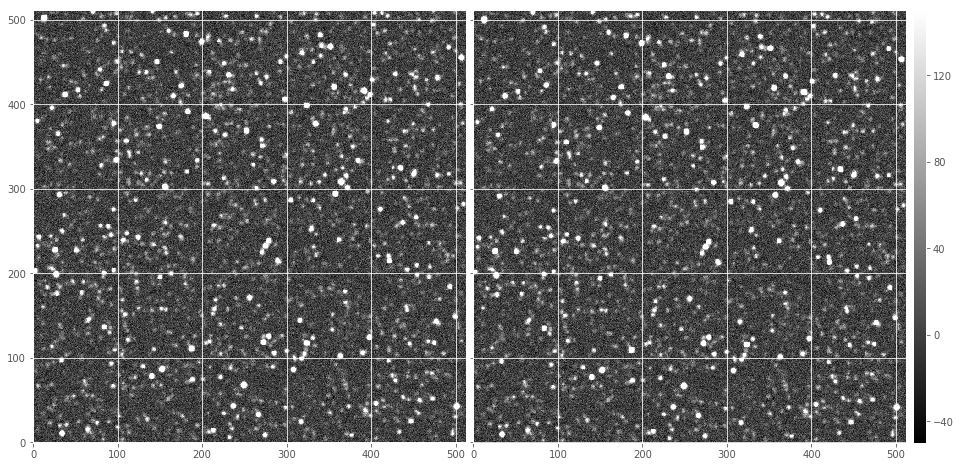

In [53]:
print dit.computeClippedImageStats(exposure.getMaskedImage().getImage().getArray())
print dit.computeClippedImageStats(newExp.getMaskedImage().getImage().getArray())
print dit.computeClippedImageStats(exposure.getMaskedImage().getImage().getArray()-newExp.getMaskedImage().getImage().getArray())
dit.plotImageGrid((exposure.getMaskedImage().getImage(), newExp.getMaskedImage().getImage()), clim=(-50,150), imScale=8)

## Now test with overlapping cells

In [26]:
import lsst.ip.diffim as ipDiffim
#reload(ipDiffim)
config = ipDiffim.ImageMapReduceConfig()
config.gridStepX = config.gridStepY = 8

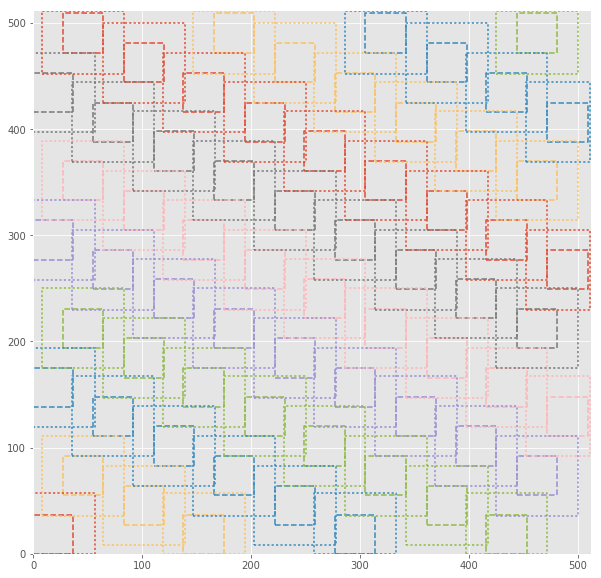

In [29]:
task = ipDiffim.ImageMapReduceTask(config=config)
plt.figure(figsize=(10,10))
task._generateGrid(exposure, forceEvenSized=True)
task.plotBoxes(exposure.getBBox(), skip=5);

In [31]:
newExp = task.run(exposure).exposure  # this just returns the exposure

stats(mean=5.4581165, stdev=20.282354, min=-72.0, max=1879.0)
stats(mean=5.4880233, stdev=20.29269, min=-72.0, max=1879.0)
stats(mean=0.0, stdev=0.0, min=0.0, max=0.0)


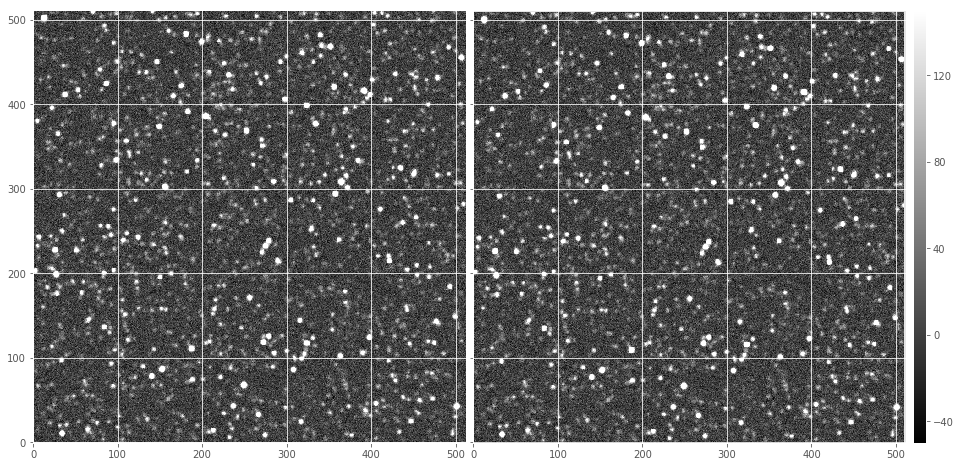

In [32]:
print dit.computeClippedImageStats(exposure.getMaskedImage().getImage().getArray())
print dit.computeClippedImageStats(newExp.getMaskedImage().getImage().getArray())
print dit.computeClippedImageStats(exposure.getMaskedImage().getImage().getArray()-newExp.getMaskedImage().getImage().getArray())
dit.plotImageGrid((exposure.getMaskedImage().getImage(), newExp.getMaskedImage().getImage()), clim=(-50,150), imScale=8)